## Submitted by
### Anurag Nagarkoti (239426), Wahab Haseeb Bhatti (239978), Suyash Gawandi (239716)

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
# remove infrequent words. you can play with this parameter as it will likely impact model quality
num_words = 20000
(train_sequences, train_labels), (test_sequences, test_labels) = tf.keras.datasets.imdb.load_data(num_words=num_words)

In [3]:
# look at some sequences. words have been replaced with arbitrary index mappings
# 1 is a special "beginning of sequence" marker
# infrequent words have been replaced by the index 2
# actual words start with index 4, 3 is never used (???)
train_sequences[:3]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [4]:
# labels are simply binary: sentiment can be positive or negative
train_labels[:3]

array([1, 0, 0])

In [5]:
# to restore words, load the word-to-index mapping
word_to_index = tf.keras.datasets.imdb.get_word_index()

In [6]:
# invert to get index-to-word mapping
index_to_word = dict((index, word) for (word, index) in word_to_index.items())

In [7]:
# we can convert a sequence to text by
# - replacing each index by the respective word
# - joining words together via spaces
# note that we remove the beginning of sequence character and we have to subtract 3 from all indices
# this is because, as mentioned above, the smallest indices are reserved for special characters
# but for some reason this is not reflected in the mapping...
" ".join([index_to_word.get(index - 3, "UNKNOWN") for index in train_sequences[0][1:]])

"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert UNKNOWN is an amazing actor and now the same being director UNKNOWN father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the UNKNOWN of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be pr

In [8]:
# solution is padding all sequences to the maximum length.
# first find the maximum length
sequence_lengths = [len(sequence) for sequence in train_sequences]
max_len = max(sequence_lengths)
max_len

2494

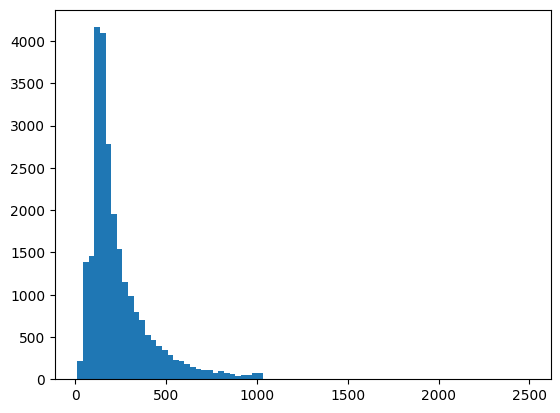

In [9]:
# overview over sequence lengths in the data
# could also look at mean, median, standard deviation...
plt.hist(sequence_lengths, bins=80)
plt.show()

In [10]:
# luckily there is a convenient function for padding
train_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_len)

In [11]:
# now we can create a dataset!
train_data = tf.data.Dataset.from_tensor_slices((train_sequences_padded, train_labels))

2023-11-16 12:25:11.154052: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-16 12:25:11.154076: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-16 12:25:11.154082: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-16 12:25:11.154274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-16 12:25:11.154534: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
# all sequences are... very long
train_sequences_padded.shape

(25000, 2494)

In [13]:
max_len = 200
batch_size = 100
train_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(
    train_sequences, maxlen=max_len)
train_data = tf.data.Dataset.from_tensor_slices(
    (train_sequences_padded, train_labels)).shuffle(25000).batch(batch_size)
train_sequences_padded.shape

(25000, 200)

In [14]:
# for fun, you can look at the word-index mappings.
# in this case, the mapping was done according to word frequency.
# you can pass reverse=True to sorted() to look at the least common words.
sorted(index_to_word.items())[:100]

[(1, 'the'),
 (2, 'and'),
 (3, 'a'),
 (4, 'of'),
 (5, 'to'),
 (6, 'is'),
 (7, 'br'),
 (8, 'in'),
 (9, 'it'),
 (10, 'i'),
 (11, 'this'),
 (12, 'that'),
 (13, 'was'),
 (14, 'as'),
 (15, 'for'),
 (16, 'with'),
 (17, 'movie'),
 (18, 'but'),
 (19, 'film'),
 (20, 'on'),
 (21, 'not'),
 (22, 'you'),
 (23, 'are'),
 (24, 'his'),
 (25, 'have'),
 (26, 'he'),
 (27, 'be'),
 (28, 'one'),
 (29, 'all'),
 (30, 'at'),
 (31, 'by'),
 (32, 'an'),
 (33, 'they'),
 (34, 'who'),
 (35, 'so'),
 (36, 'from'),
 (37, 'like'),
 (38, 'her'),
 (39, 'or'),
 (40, 'just'),
 (41, 'about'),
 (42, "it's"),
 (43, 'out'),
 (44, 'has'),
 (45, 'if'),
 (46, 'some'),
 (47, 'there'),
 (48, 'what'),
 (49, 'good'),
 (50, 'more'),
 (51, 'when'),
 (52, 'very'),
 (53, 'up'),
 (54, 'no'),
 (55, 'time'),
 (56, 'she'),
 (57, 'even'),
 (58, 'my'),
 (59, 'would'),
 (60, 'which'),
 (61, 'only'),
 (62, 'story'),
 (63, 'really'),
 (64, 'see'),
 (65, 'their'),
 (66, 'had'),
 (67, 'can'),
 (68, 'were'),
 (69, 'me'),
 (70, 'well'),
 (71, 'than'),


In [15]:
sequence_lengths = [len(sequence) for sequence in train_sequences_padded]
max_len = max(sequence_lengths)
max_len

200

In [19]:
# here is a high-level sketch for training RNNs

batch_size=100
hidden_size=200
U = tf.Variable(np.random.normal(size=(num_words, hidden_size),scale=0.1),dtype=np.float32)
W = tf.Variable(np.random.normal(size=(hidden_size, hidden_size),scale=0.1),dtype=np.float32)
V = tf.Variable(np.random.normal(size=(hidden_size, 2),scale=0.1),dtype=np.float32)

b = tf.Variable(np.zeros(hidden_size), dtype=np.float32)
c = tf.Variable(np.zeros(2), dtype=np.float32)

old_state = tf.Variable(tf.zeros([100, hidden_size]))


optimizer = tf.keras.optimizers.legacy.Adam(0.01)
weights=[W, U, V, b, c]
learning_rate=0.1
# training loop -- same thing as before!!
# our data is now slightly different (each batch of sequences has a time axis, which is kinda new)
# but all the related changes are hidden away at lower levels
@tf.function
def train_loop():
    batch=1
    for sequence_batch, label_batch in train_data:
        train_step(sequence_batch, label_batch, batch)
        batch=batch+1


# a single training step -- again, seems familiar?
def train_step(sequences, labels, batch):

    with tf.GradientTape() as tape:
        logits = rnn_loop(sequences)
        loss =  tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=labels))

    grads = tape.gradient(loss, weights)
    optimizer.apply_gradients(zip(grads, weights))
    preds = tf.argmax(logits, axis=1, output_type=tf.int64)
    acc = tf.reduce_mean(tf.cast(tf.equal(preds, labels), tf.float32))
    print("Batch {} Training Loss: {} Accuracy: {}".format(batch,loss, acc))

# here's where things start to change
# we loop over the input time axis, and at each time step compute the new
# hidden state based on the previous one as well as the current input
# the state computation is hidden away in the rnn_step function and could be
# arbitrarily complex.
# in the general RNN, an output is computed at each time step, and the whole
# sequence is returned. but in this case, since we only have one label for the
# entire sequence, we only use the final state to compute one output and return it.
# before the loop, the state need to be initialized somehow.
def rnn_loop(sequences):

    old_state = tf.zeros([100, hidden_size])
    

    for step in tf.range(max_len):
        x_t = sequences[:, step] # sequences is batch x 
        x_t = tf.one_hot(x_t, depth=num_words)
        new_state = rnn_step(old_state, x_t)
        old_state = new_state

    o_t = output_loop(new_state)

    return o_t

# see formulas in the book ;)
def rnn_step(state, x_t):
    at= b + tf.matmul(state,W) + tf.matmul(x_t, U)
    state= tf.nn.tanh(at)
    return state

def output_loop(state):
    o_t= c + tf.matmul(state, V)
    return o_t




In [20]:
train_loop()

Batch Tensor("args_0:0", shape=(), dtype=int32) Training Loss: Tensor("Mean:0", shape=(), dtype=float32) Accuracy: Tensor("Mean_1:0", shape=(), dtype=float32)
Batch Tensor("args_0:0", shape=(), dtype=int32) Training Loss: Tensor("Mean:0", shape=(), dtype=float32) Accuracy: Tensor("Mean_1:0", shape=(), dtype=float32)


2023-11-16 12:31:38.172238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-16 12:31:38.249622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-16 12:31:38.305177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [ ]:
test_sequences_padded = tf.keras.preprocessing.sequence.pad_sequences(
    test_sequences, maxlen=max_len)
test_data = tf.data.Dataset.from_tensor_slices(
    (test_sequences_padded, test_labels)).batch(batch_size)
test_sequences_padded.shape

(25000, 200)

In [ ]:
def test_loop(sequences, labels, batch):
    logits=rnn_loop(sequences)
    loss =  tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=labels))    
    preds = tf.argmax(logits, axis=1, output_type=tf.int64)
    acc = tf.reduce_mean(tf.cast(tf.equal(preds, labels), tf.float32))
    print("Batch {} Testing Loss: {} Accuracy: {}".format(batch, loss, acc))

batch=1
for sequences, labels in test_data:
    test_loop(sequences, labels, batch)
    batch+=1

Batch 1 Training Loss: 0.6425560116767883 Accuracy: 0.6499999761581421
Batch 2 Training Loss: 0.7212902903556824 Accuracy: 0.5199999809265137
Batch 3 Training Loss: 0.6428536176681519 Accuracy: 0.5899999737739563
Batch 4 Training Loss: 0.7031936645507812 Accuracy: 0.550000011920929
Batch 5 Training Loss: 0.6836218237876892 Accuracy: 0.5299999713897705
Batch 6 Training Loss: 0.6318041682243347 Accuracy: 0.6599999666213989
Batch 7 Training Loss: 0.6912916302680969 Accuracy: 0.5099999904632568
Batch 8 Training Loss: 0.6921981573104858 Accuracy: 0.5799999833106995
Batch 9 Training Loss: 0.6861246228218079 Accuracy: 0.5600000023841858
Batch 10 Training Loss: 0.6899120807647705 Accuracy: 0.550000011920929
Batch 11 Training Loss: 0.7417776584625244 Accuracy: 0.5099999904632568
Batch 12 Training Loss: 0.7159121036529541 Accuracy: 0.5600000023841858
Batch 13 Training Loss: 0.7341687083244324 Accuracy: 0.5
Batch 14 Training Loss: 0.6257787942886353 Accuracy: 0.6299999952316284
Batch 15 Training 

#### Food for thought #1: Why is this wasteful? Can you think of a smarter padding scheme that is more efficient? Consider the fact that RNNs can work on arbitrary sequence lengths, and that training minibatches are pretty much independent of each other.
-  Learning on padding does not make sense as padding does not have any meaning
-  smarter padding schemes: pad accoring to each batch, batch bucketing ie put sequences of similar length into a bucket of length size

#### Food for thought #2: Between truncating long sequences and removing them, which option do you think is better? Why?
- Truncating seems like the better option as we still retain some information than to completely lose it.
- Truncating might not be good as the meaningful part of a sequences might be truncated

#### Food for thought #3: Can you think of a way to avoid the one-hot vectors completely? Even if you cannot implement it, a conceptual idea is fine.
- TF-IDF, Word Embeddings

#### Food for thought #4: How can it be that we can choose how many outputs we have, i.e. how can both be correct? Are there differences between both choices as well as (dis)advantages relative to each other?

#### Food for thought #5: All sequences start with the same special “beginning of sequence” token (coded by index 1). Given this fact, is there a point in learning an initial state? Why (not)?


#### Food for thought #6: pad_sequences allows for pre or post padding. Try both to see the difference. Which option do you think is better? Recall that we use the final time step output from our model.
- prepadding 

#### Food for thought #7: Can you think of a way to prevent the RNN from computing new states on padded time steps? One idea might be to “pass through” the previous state in case the current time step is padding. Note that, within a batch, some sequences might be padded for a given time step while others are not.


#### Food for thought #8: What could be the advantage of using methods like the above? What are disadvantages? Can you think of other methods to incorporate the full output sequence instead of just the final step?

#### Cross entropy measures log probabilities which might be high even for instances classified correctly